In [14]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('./df_final.csv')
print(df.head())
print(df.shape)

                        original_title release_date       budget  runtime  \
0                         The Way Back   2010-11-22  56666666.67      133   
1  A Turtle's Tale: Sammy's Adventures   2010-08-03  80000000.00       88   
2                 Get Him to the Greek   2010-06-03  58000000.00      109   
3                           Last Night   2010-11-05  26500000.00       93   
4             Tucker and Dale vs. Evil   2010-01-22  25000000.00       89   

   popularity  vote_average  vote_count  ratings  oscar_winner  oscar_noms  \
0      24.712         6.986        1461      7.3             0           1   
1      26.522         5.986         611      6.0             0           0   
2      26.663         5.971        1671      6.3             0           0   
3      16.456         6.120         724      6.5             0           0   
4      24.375         7.369        2575      7.5             0           0   

   ...  Adventure  Comedy  Thriller  box_office  release_month  rele

In [7]:
df.columns

Index(['original_title', 'release_date', 'budget', 'runtime', 'popularity',
       'vote_average', 'vote_count', 'ratings', 'oscar_winner', 'oscar_noms',
       'Action', 'Documentary', 'Fantasy', 'Crime', 'Animation', 'Romance',
       'Mystery', 'Science Fiction', 'Family', 'Drama', 'War', 'History',
       'Horror', 'Music', 'Western', 'Adventure', 'Comedy', 'Thriller',
       'box_office', 'release_month', 'release_year', 'release_dayofweek',
       'imputed', 'ROI', 'earn_class'],
      dtype='object')

In [8]:
df = df[['budget', 'runtime', 'popularity',
       'vote_average', 'vote_count', 'ratings', 'oscar_winner', 'oscar_noms',
       'Action', 'Documentary', 'Fantasy', 'Crime', 'Animation', 'Romance',
       'Mystery', 'Science Fiction', 'Family', 'Drama', 'War',
       'History', 'Horror', 'Music', 'Western', 'Adventure', 'Comedy',
       'Thriller', 'box_office', 'release_month', 'release_year',
       'release_dayofweek']]

In [9]:
# transform month and day into binary
df_month = pd.get_dummies(df['release_month'], prefix='month')
df_day = pd.get_dummies(df['release_dayofweek'], prefix='day')
df = pd.concat([df, df_month, df_day], axis=1)
df.head()

,budget,runtime,popularity,vote_average,vote_count,ratings,oscar_winner,oscar_noms,Action,Documentary,...,month_10,month_11,month_12,day_0,day_1,day_2,day_3,day_4,day_5,day_6
0,56666666.67,133,24.712,6.986,1461,7.3,0,1,0,0,...,False,True,False,True,False,False,False,False,False,False
1,80000000.00,88,26.522,5.986,611,6.0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
2,58000000.00,109,26.663,5.971,1671,6.3,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
3,26500000.00,93,16.456,6.120,724,6.5,0,0,0,0,...,False,True,False,False,False,False,False,True,False,False
4,25000000.00,89,24.375,7.369,2575,7.5,0,0,0,0,...,False,False,False,False,False,False,False,True,False,False


## Baseline Model

In [11]:
# Build baseline model
x_base = df['budget']
y_base = df['box_office']

x_base = sm.add_constant(x_base)
model_base = sm.OLS(y_base, x_base).fit()
model_base.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             box_office   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     1875.
Date:                Thu, 07 Mar 2024   Prob (F-statistic):          1.22e-261
Time:                        14:55:12   Log-Likelihood:                -28994.
No. Observations:                1418   AIC:                         5.799e+04
Df Residuals:                    1416   BIC:                         5.800e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.728e+07   6.65e+06     -2.598      0.009   -3.03e+07   -4.23e+06
budget         3.5595      0.082     43.307      0.000       3.398       3.721
==============================================================================
Omnibus:                      736.978   Durbin-Watson:                   1.663
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9823.197
Skew:                           2.099   Prob(JB):                         0.00
Kurtosis:                      15.191   Cond. No.                     1.10e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
# compute rmse
y_pred = model_base.predict(x_base)
res = y_base - y_pred

rmse = np.sqrt((res ** 2).mean())

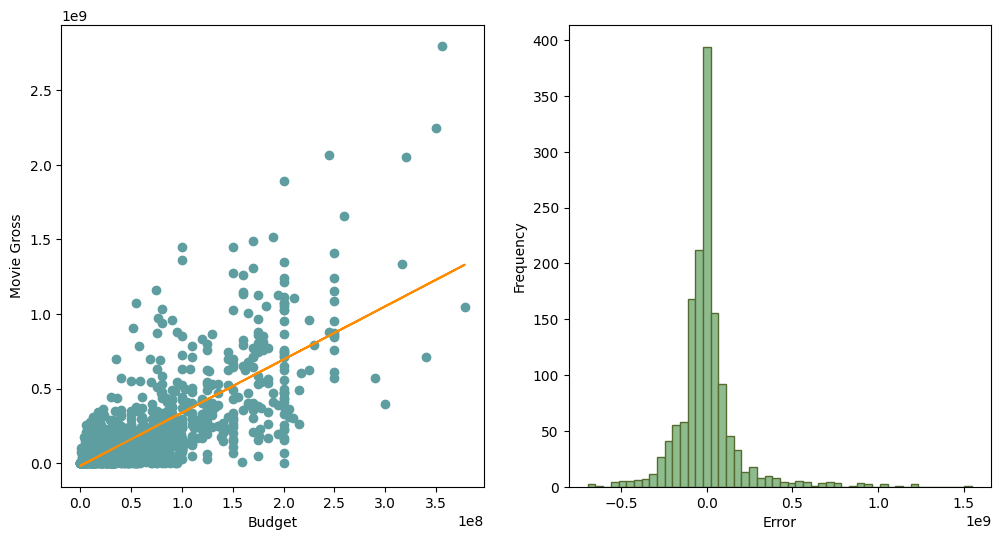

Root Mean Squared Error: 183640815.62439677


In [27]:
# plot the model
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

axes[0].scatter(x=df['budget'], y=y_base, color = 'cadetblue')
axes[0].plot(df['budget'], y_pred, color = 'darkorange')
axes[0].set_xlabel('Budget')
axes[0].set_ylabel('Movie Gross')

axes[1].hist(res, bins=50, color='darkseagreen', edgecolor = 'darkolivegreen')
axes[1].set_xlabel('Error')
axes[1].set_ylabel('Frequency')

plt.show() # e = y - y_pred, the plot shows more movies are underestimated in the base model
print(f'Root Mean Squared Error: {rmse}')

## Compute Test Data

In [29]:
genres = ['Action', 'Documentary', 'Fantasy', 'Crime', 'Animation', 'Romance',
       'Mystery', 'Science Fiction', 'Family', 'Drama', 'War', 'History',
       'Horror', 'Music', 'Western', 'Adventure', 'Comedy', 'Thriller']

In [30]:
# compute vote count median by genres
vote_count_median = {}
for genre in genres:
    md = df[df[genre] == 1]['vote_count'].median()
    vote_count_median[genre] = md

In [31]:
# compute vote average mean by genres
vote_avg_mean = {}
for genre in genres:
    mn = df[df[genre] == 1]['vote_average'].mean()
    vote_avg_mean[genre] = mn

In [32]:
# compute popularity median by genres
pop_median = {}
for genre in genres:
    md = df[df[genre] == 1]['popularity'].median()
    pop_median[genre] = md

In [34]:
# import test set
import ast

df_test = pd.read_csv('./test_set.csv')
df_test['genre_list'] = df_test['genre_list'].apply(ast.literal_eval)

In [35]:
# function to map genre median/mean to movies
def value_map(dictionary, row):
    values = []
    for key in row:
        try:
            values.append(dictionary[key])
        except KeyError:
            values.append(np.nan)   # or a default value of your choice
    return values

In [36]:
# impute counts
df_test['imputed_count'] = df_test['genre_list'].apply(lambda row: np.median(value_map(vote_count_median, row)))

# impute average
df_test['imputed_average'] = df_test['genre_list'].apply(lambda row: np.mean(value_map(vote_avg_mean, row)))

#impute popularity
df_test['imputed_pop'] = df_test['genre_list'].apply(lambda row: np.median(value_map(pop_median, row)))

In [38]:
df_test.drop(columns=['popularity', 'vote_average', 'vote_count'], inplace = True)
print(df_test.head())

       original_title     budget  runtime  ratings  oscar_noms  oscar_winner  \
0  Love Lies Bleeding  247800000    104.0      7.7           2             0   
1     Kung Fu Panda 4  160000000     94.0      7.0           2             1   
2           Imaginary   13000000    104.0      4.0           0             0   
3             Cabrini   50000000    145.0      8.0           2             0   
4    Accidental Texan   10000000    104.0      8.0           1             0   

                                          genre_list release_date  \
0  [Action, Adventure, Crime, Mystery, Romance, T...     3/8/2024   
1  [Animation, Action, Adventure, Comedy, Family,...     3/8/2024   
2                                 [Horror, Thriller]     3/8/2024   
3                                        [Biography]     3/8/2024   
4                                    [Comedy, Drama]     3/8/2024   

   release_month  release_year  ...  History  Horror  Music  Western  Action  \
0              3        